In [8]:
import numpy as np
import scipy.linalg
import random
import networkx as nx
import matplotlib.pyplot as plt
import planarity
import geopandas as gpd

In [9]:
def rand_adj_mat(size=2):
    m = np.zeros([size,size])
    for i in range(size):
        for j in range(i):
            b = int(random.random()< .01)
            m[i,j] = b
            m[j,i] = b
    return m


def rand_conn_adj_mat(size=2):
    x  = 0
    while x == 0:
        m = rand_adj_mat(size)
        x = np.prod(scipy.linalg.eigvals(m)[0])
    return m

def rand_conn_er(size,p):
    c = False
    while not c:    
        m = nx.fast_gnp_random_graph(size,p)
        c = nx.is_connected(m)
    return nx.adjacency_matrix(m)

def rand_conn_nm(n,e):
    c = False
    while not c:
        m = nx.gnm_random_graph(n,e)
        c = nx.is_connected(m)
    print(planarity.is_planar(m))
    return nx.adjacency_matrix(m)

In [6]:

n=dist.shape[0]
h = []

for i in range(500):
    if i%50==0: print(i)
    adj = rand_conn_adj_mat(dist.shape[0])
    deg = np.diag(adj.sum(axis=0))
    lap = deg - adj
    evals = np.real(scipy.linalg.eigvals(lap).tolist())
    evals = [e for e in evals if e>.1]
    for l in evals: h.append(l)


In [2]:
plt.hist(h,density=True,bins=30, range=[0,15])
random.shuffle(d_e)

plt.axvline(min(d_e), color='k', linestyle='dashed', linewidth=1)
plt.axvline(max(d_e), color='k', linestyle='dashed', linewidth=1)



NameError: name 'plt' is not defined

In [50]:
new_vals = []
df_cd = gpd.read_file('cd_us.shp')
state_no='42'
# (somewhat unnecessarily) loop over all rows in the DataFrame
for ind, row in df_cd.iterrows():

    # grab the identifying information
    fcode = row['STATECD']
    st = row['STATEFP']
    fn = fcode[0:2]+'_'+fcode

    # if this row is something we need to compute:

    if st==state_no or state_no=='all':
    # read in the corresponding district's adjacency matrix
        # [see README in the adj_mats folder for more info]
        adj = np.loadtxt('adj_mats/'+fn+'_dist.txt',
                         delimiter=',')

        # make sure it's an integer matrix
        adj = adj.astype(int)

        g = nx.from_numpy_matrix(adj)
        # you can build a laplacian matrix
        deg = np.diag(adj.sum(axis=0))
        lap = deg - adj
        evals = np.real(scipy.linalg.eigvals(lap)).tolist()
        new_vals += [x for x in evals if x>0]


717
1544
2044
2336
2915
3228
3632
3971
4545
5060
5516
6139
6687
7554
7878
8206
8648
9248


(array([1.01643599e-01, 9.06574394e-02, 9.39446367e-02, 1.13148789e-01,
        1.14878893e-01, 1.09515571e-01, 8.47750865e-02, 5.09515571e-02,
        2.27508651e-02, 1.12456747e-02, 4.23875433e-03, 1.29757785e-03,
        3.46020761e-04, 3.46020761e-04, 1.73010381e-04, 0.00000000e+00,
        8.65051903e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([ 0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ,
        11.25, 12.5 , 13.75, 15.  , 16.25, 17.5 , 18.75, 20.  , 21.25,
        22.5 , 23.75, 25.  ]),
 <a list of 20 Patch objects>)

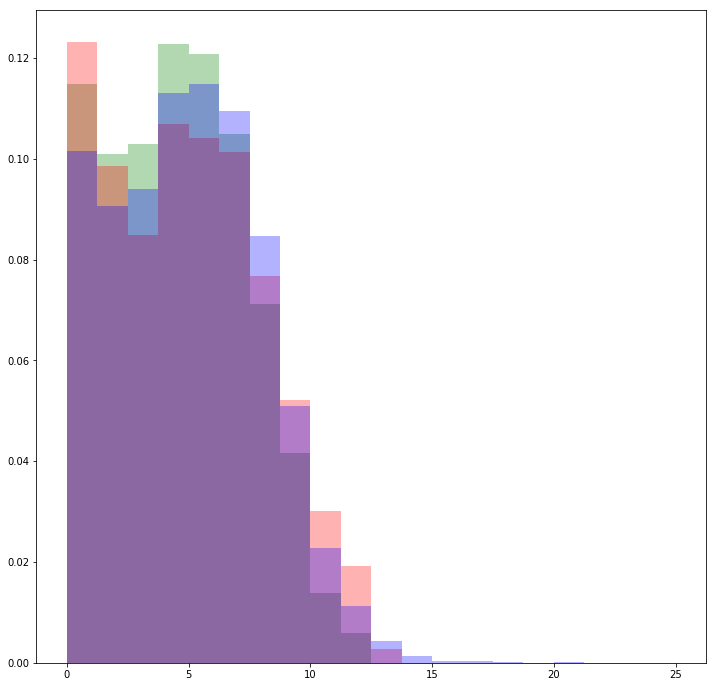

In [59]:

dist = np.loadtxt('adj_mats/42_4207_dist.txt',delimiter=',')
lap_d  = np.diag(dist.sum(axis=0)) - dist
d_e = np.real(scipy.linalg.eigvals(lap_d))

dist = np.loadtxt('adj_mats/42_4204_dist.txt',delimiter=',')
lap_d  = np.diag(dist.sum(axis=0)) - dist
d_t = np.real(scipy.linalg.eigvals(lap_d))


d_e = [x for x in d_e if x>0]
d_t = [x for x in d_t if x>0]



#plt.hist(new_vals, density=True, bins=100, range = [0,30])
random.shuffle(d_e)
random.shuffle(d_t)
#for c in d_e[:20]: plt.axvline(c, color='k', linestyle='dashed', linewidth=1)
#for c in d_t[:20]: plt.axvline(c, color='r', linestyle='dashed', linewidth=1)
plt.figure(figsize=(12,12))
plt.hist(d_e, bins=20, alpha=.3, density=True, color='green',range=[0,25])
plt.hist(d_t, bins=20, alpha = .3, density= True, color='red',range=[0,25])
plt.hist(new_vals, bins=20, alpha=.3, density=True, color='blue', range=[0,25])